<a href="https://colab.research.google.com/github/IA-DAMA/ML_ClassificationModels/blob/main/MAGIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

**Dataset** >> https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

**Dataframe was created and data was set for use**

In [2]:
cols = ["fLenght", "fWidth","fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class" ] #Lable Cols
df = pd.read_csv("magic04.data", names=cols) # name=cols >> Label cols into names
df.head() # >> Labels

fLenght    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

**Instead G/H Labels - 1/0 Labels - So that Binary**

In [3]:
## df["class"].unique()   //  or... because computer is better at understanding number than letter:
df["class"] = (df["class"] == "g").astype(int)

**Predicting Gamma**

In [4]:
df.head() # Now classes Binaries

fLenght    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

**Graphics for showing cols values - plot.hist**

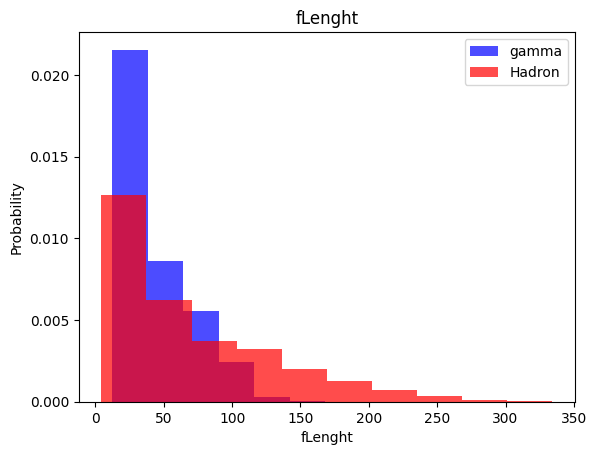

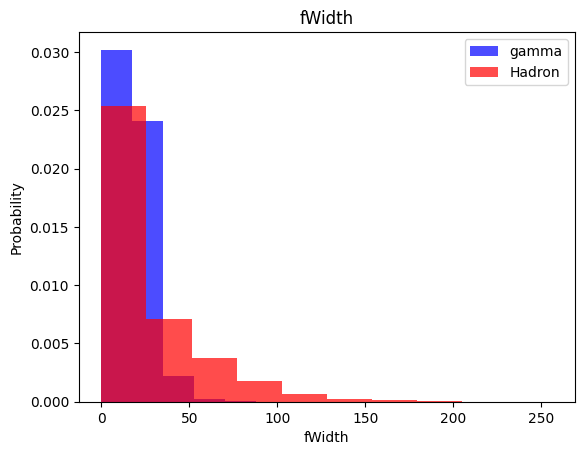

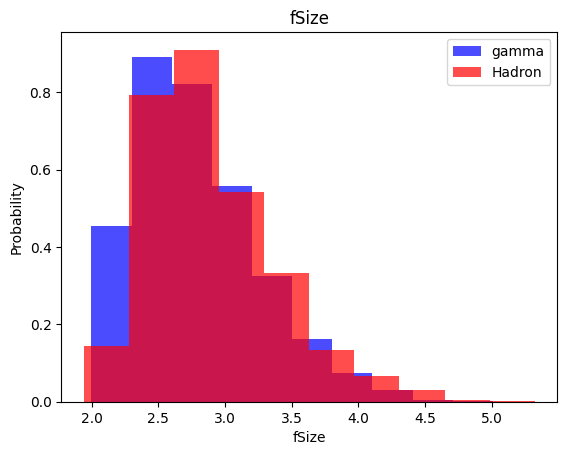

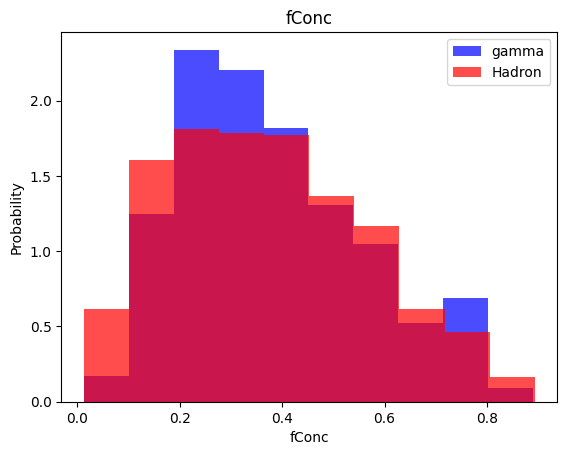

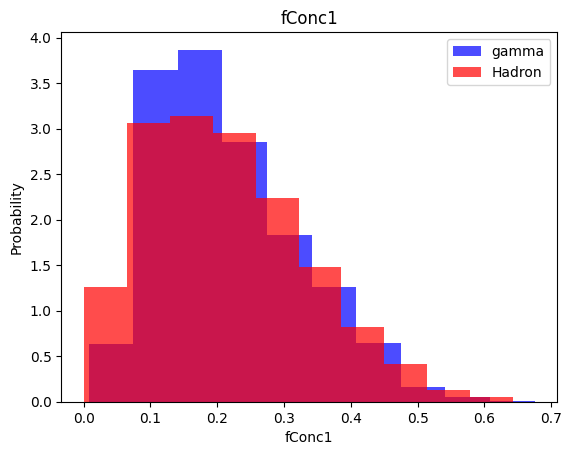

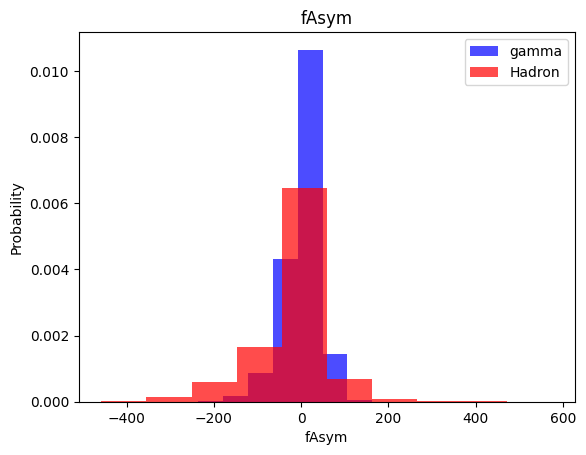

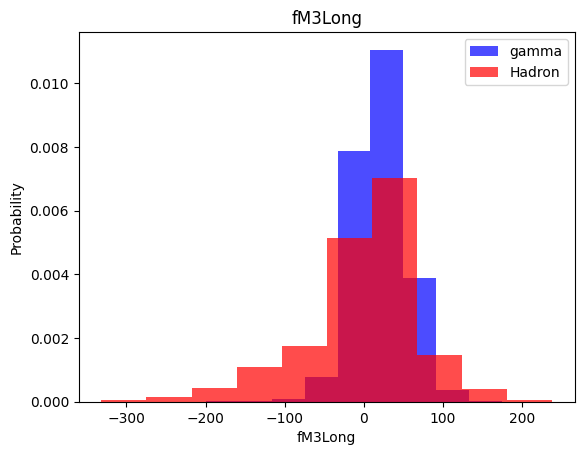

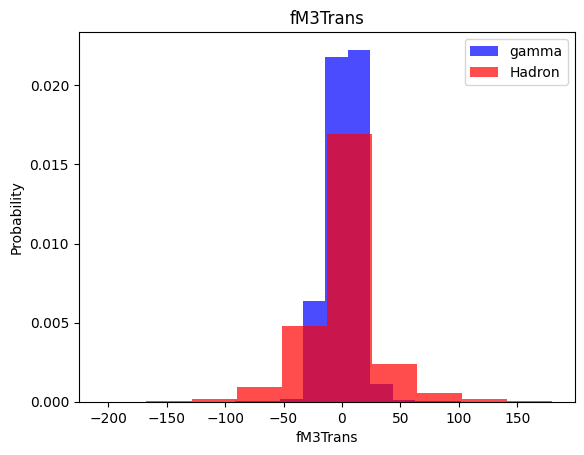

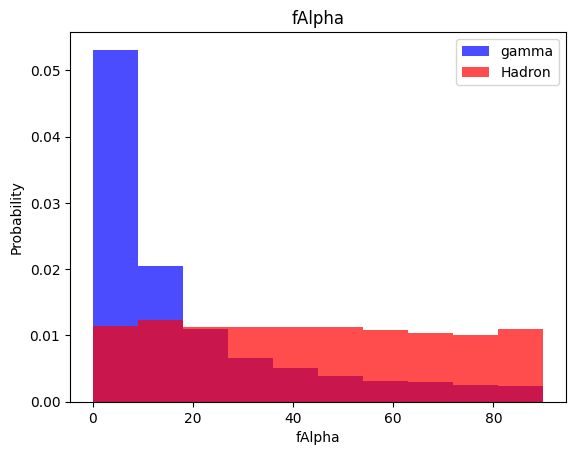

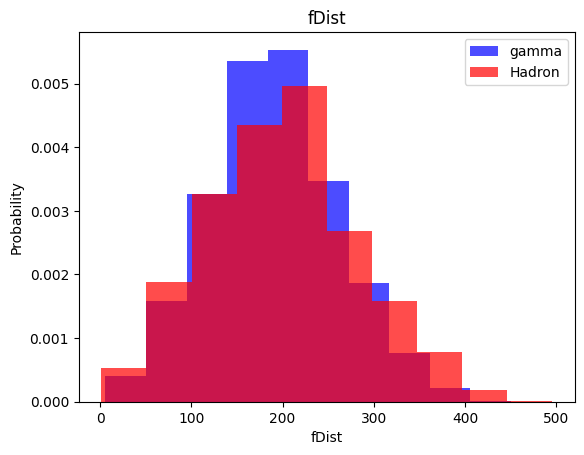

In [5]:
for label in cols[:-1]:
  plt.hist(df[df["class"] ==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"] ==0][label], color='red', label='Hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# **Train, Validation, tests datasets**

In [6]:
# Checking between 6 and 8
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

Function called "scale_dataset"

In [7]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(X)

  if oversample:
   ros = RandomOverSampler()
   X, y = ros.fit_resample(X,y) # Take more data to increase the number of samples

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

**Training**

In [8]:
#train, X_train, y_train = scale_dataset(train, oversample=True)
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

**KNN - K-Neighbors imported**

In [9]:
from sklearn.neighbors import KNeighborsClassifier #Because we're going to classify
from sklearn.metrics import classification_report

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=7) # What if (n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [11]:
y_pred = knn_model.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1352
           1       0.84      0.85      0.84      2452

    accuracy                           0.80      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.79      0.80      0.80      3804



#Naivy Bayes

**Naive_bayes imported**

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

**Making prediction and printing out classification**

In [15]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1352
           1       0.84      0.85      0.84      2452

    accuracy                           0.80      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.79      0.80      0.80      3804



#Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.70      1352
           1       0.84      0.81      0.82      2452

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



#SVM

In [19]:
from sklearn.svm import SVC

In [20]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [21]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1352
           1       0.86      0.87      0.86      2452

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.81      3804
weighted avg       0.82      0.82      0.82      3804



*4 Models of training = 70-80% = SVM seems to be better*

#Neural Network I

Neural Network "Classification"

In [22]:
import tensorflow as tf

In [23]:
def plot_loss(history):
# summarize history for loss
   plt.plot(history.history['loss'], label='loss')
   plt.plot(history.history['val_loss'], label='val_loss')
   plt.xlabel('Epoch')
   plt.ylabel('Binary crossentropy')
   plt.legend()
   plt.grid(True)
   plt.show()

#Function
def plot_accuracy(history):
# summarize history for accuracy
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()


In [24]:
nn_model = tf.keras.Sequential([
	  tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
  	tf.keras.layers.Dense(32, activation='relu'),
  	tf.keras.layers.Dense(1, activation='sigmoid')

])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
                      metrics=['accuracy'])

In [25]:
history = nn_model.fit(
   X_train, y_train, epochs=100, batch_size=32, validation_split=0.2
)

Epoch 1/100
371/371 [==============================] - 3s 3ms/step - loss: 0.9305 - accuracy: 0.6815 - val_loss: 0.8508 - val_accuracy: 0.5975
Epoch 2/100
371/371 [==============================] - 1s 3ms/step - loss: 0.5081 - accuracy: 0.7576 - val_loss: 0.5390 - val_accuracy: 0.7088
Epoch 3/100
371/371 [==============================] - 1s 2ms/step - loss: 0.4787 - accuracy: 0.7722 - val_loss: 0.6427 - val_accuracy: 0.6174
Epoch 4/100
371/371 [==============================] - 1s 2ms/step - loss: 0.4673 - accuracy: 0.7835 - val_loss: 0.7729 - val_accuracy: 0.6043
Epoch 5/100
371/371 [==============================] - 1s 3ms/step - loss: 0.4472 - accuracy: 0.7939 - val_loss: 0.7869 - val_accuracy: 0.6056
Epoch 6/100
371/371 [==============================] - 1s 4ms/step - loss: 0.4453 - accuracy: 0.7950 - val_loss: 0.5793 - val_accuracy: 0.6842
Epoch 7/100
371/371 [==============================] - 1s 3ms/step - loss: 0.4361 - accuracy: 0.7997 - val_loss: 0.7941 - val_accuracy: 0.5412

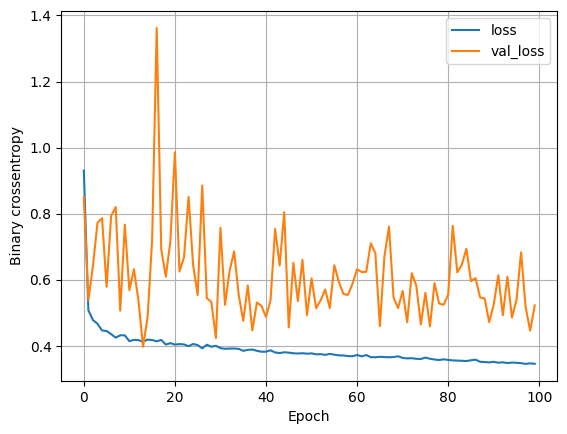

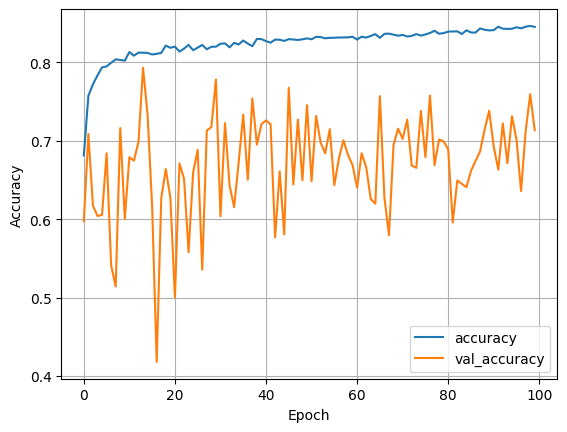

In [26]:
plot_loss(history)
plot_accuracy(history)

#-----------------------------------------------------------------------

#Neural network II

#Grid Search

In [27]:
import tensorflow as tf

**Definição da função plot_history**

In [28]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

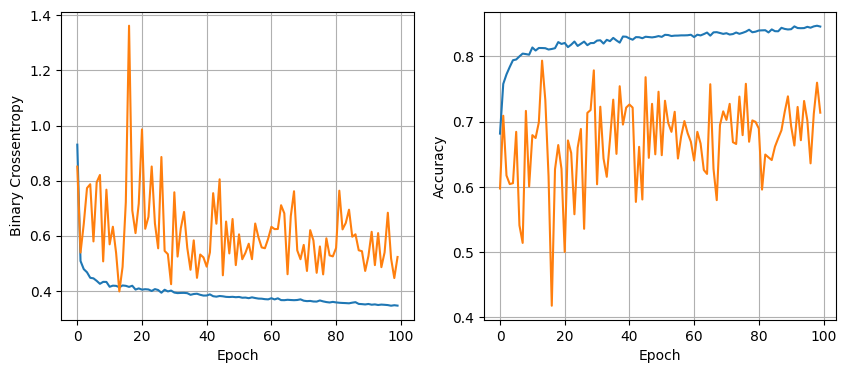

In [29]:
plot_history(history)

**Training the model within the Function**


In [30]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return nn_model, history

**This cell will call to many outputs/plots - Call Function**

16 nodes, dropout 0, lr 0.01, batch size 32


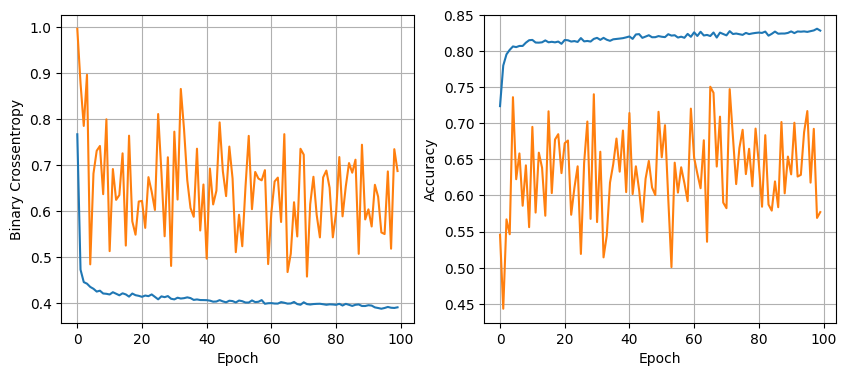

119/119 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8262
16 nodes, dropout 0, lr 0.01, batch size 64


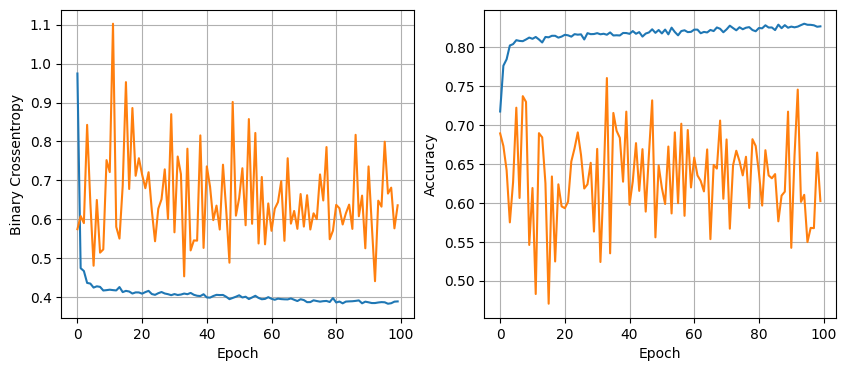

119/119 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8289
16 nodes, dropout 0, lr 0.01, batch size 128


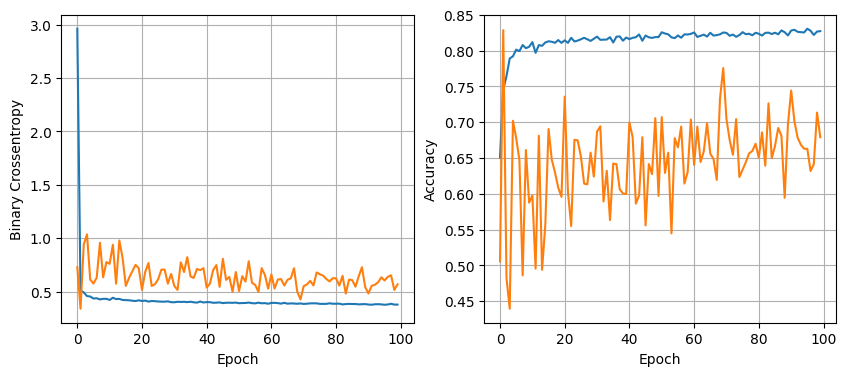

119/119 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.8352
16 nodes, dropout 0, lr 0.005, batch size 32


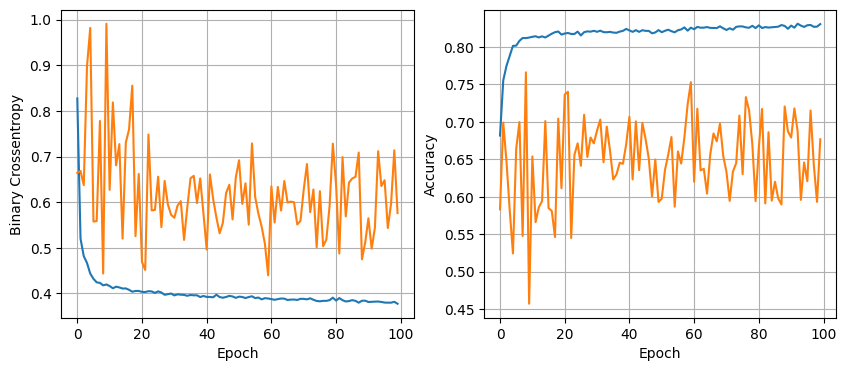

119/119 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.8286
16 nodes, dropout 0, lr 0.005, batch size 64


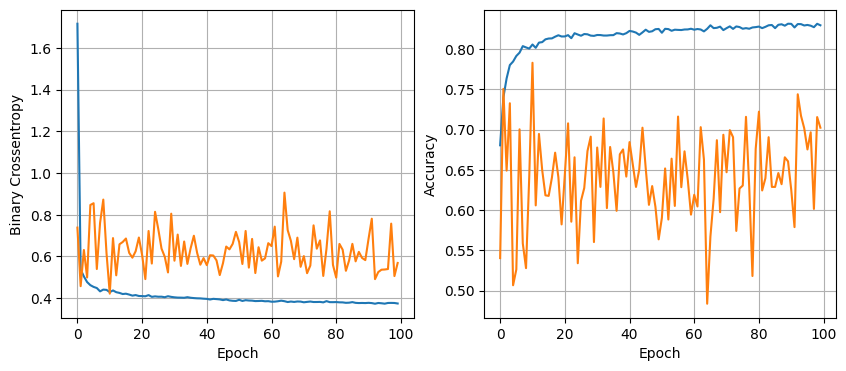

119/119 [==============================] - 0s 2ms/step - loss: 0.3786 - accuracy: 0.8323
16 nodes, dropout 0, lr 0.005, batch size 128


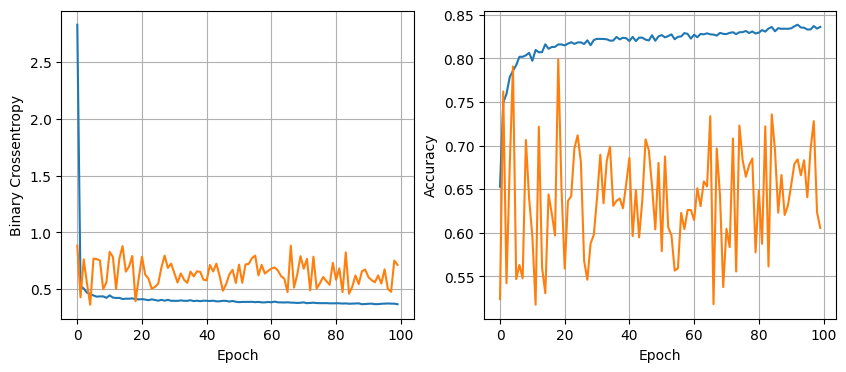

119/119 [==============================] - 0s 2ms/step - loss: 0.3796 - accuracy: 0.8352
16 nodes, dropout 0, lr 0.001, batch size 32


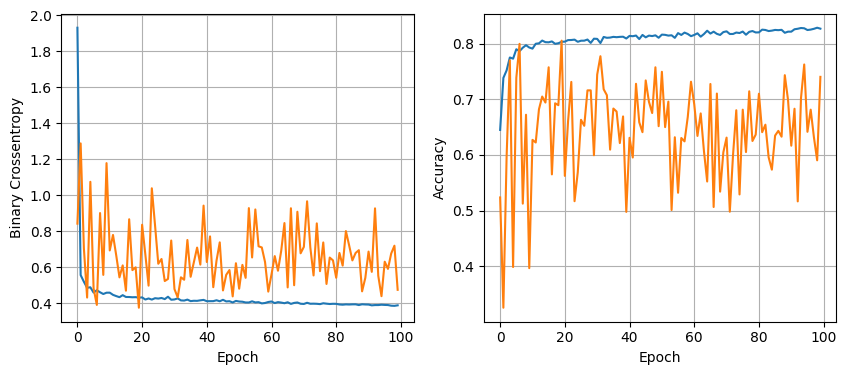

119/119 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8170
16 nodes, dropout 0, lr 0.001, batch size 64


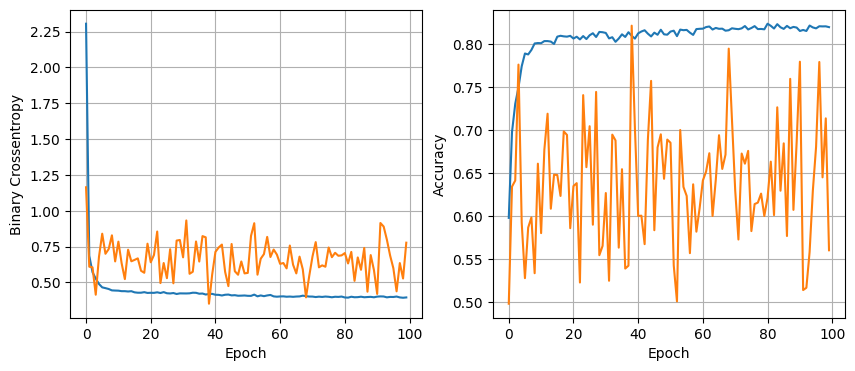

119/119 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8178
16 nodes, dropout 0, lr 0.001, batch size 128


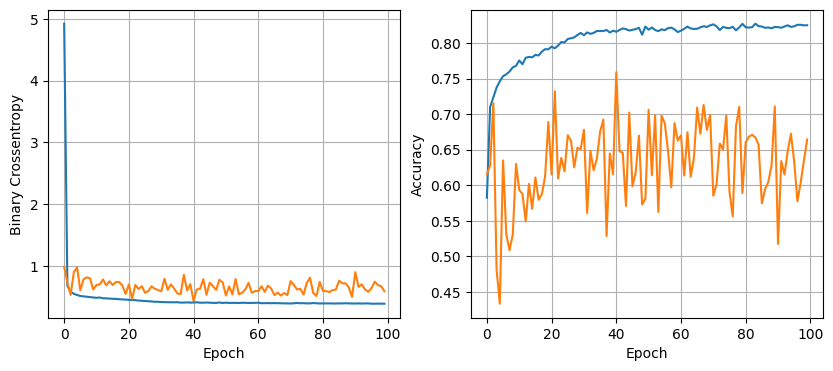

119/119 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8257
16 nodes, dropout 0.2, lr 0.01, batch size 32


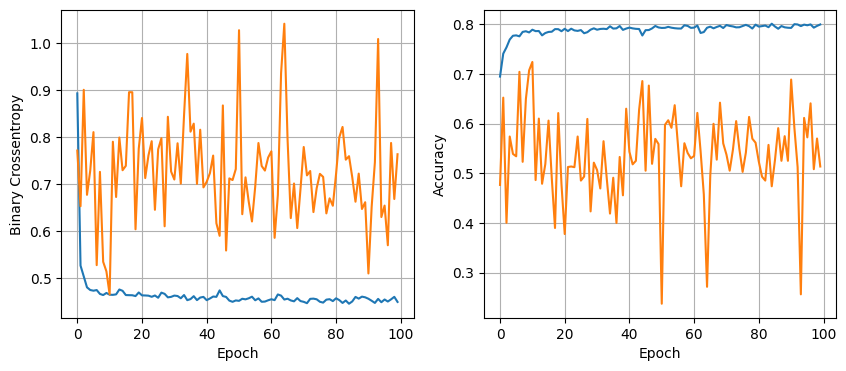

119/119 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8139
16 nodes, dropout 0.2, lr 0.01, batch size 64


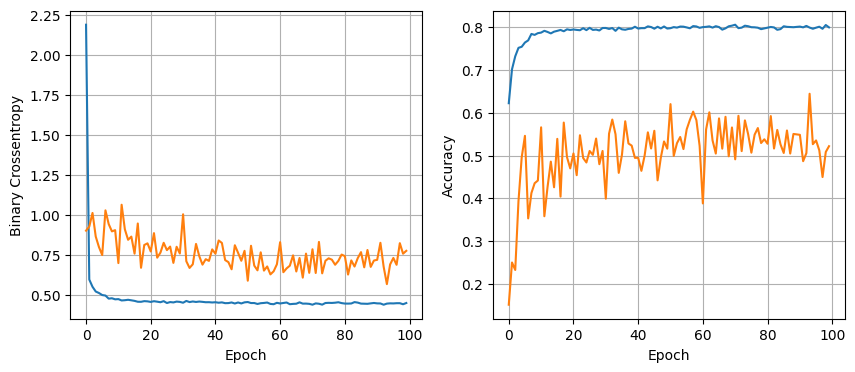

119/119 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8134
16 nodes, dropout 0.2, lr 0.01, batch size 128


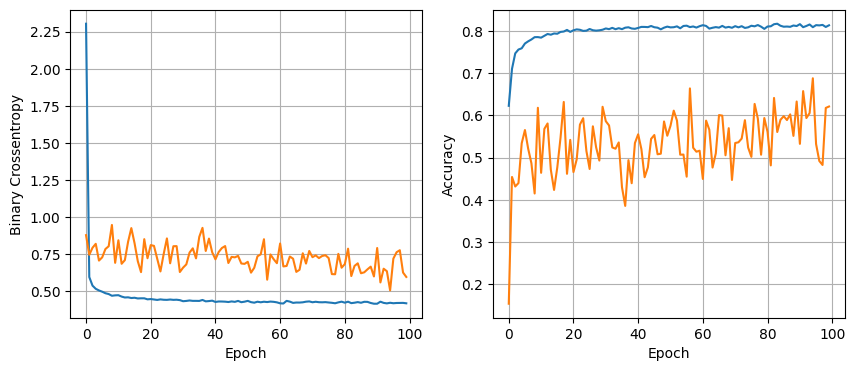

119/119 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8328
16 nodes, dropout 0.2, lr 0.005, batch size 32


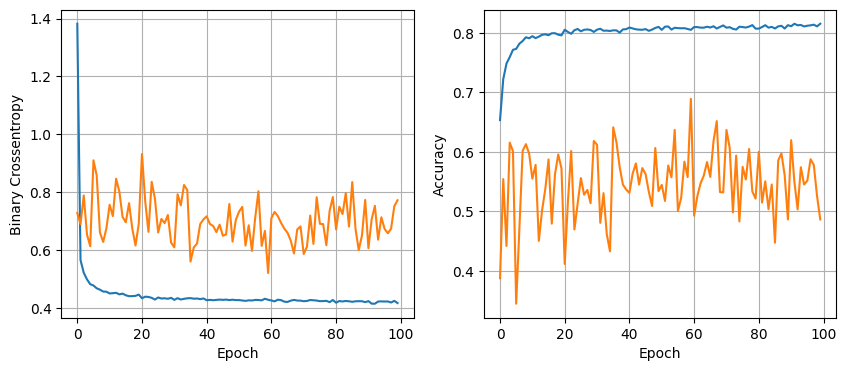

119/119 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.8005
16 nodes, dropout 0.2, lr 0.005, batch size 64


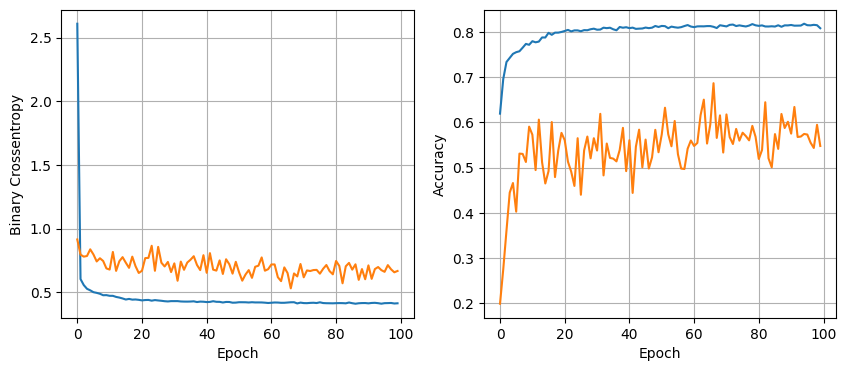

119/119 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8189
16 nodes, dropout 0.2, lr 0.005, batch size 128


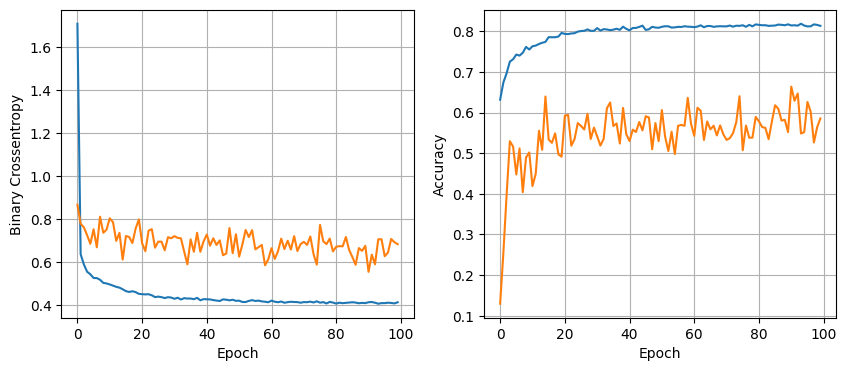

119/119 [==============================] - 0s 3ms/step - loss: 0.3925 - accuracy: 0.8291
16 nodes, dropout 0.2, lr 0.001, batch size 32


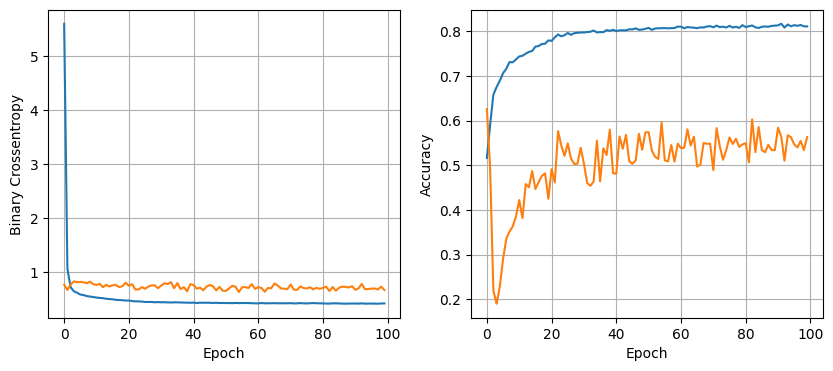

119/119 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8197
16 nodes, dropout 0.2, lr 0.001, batch size 64


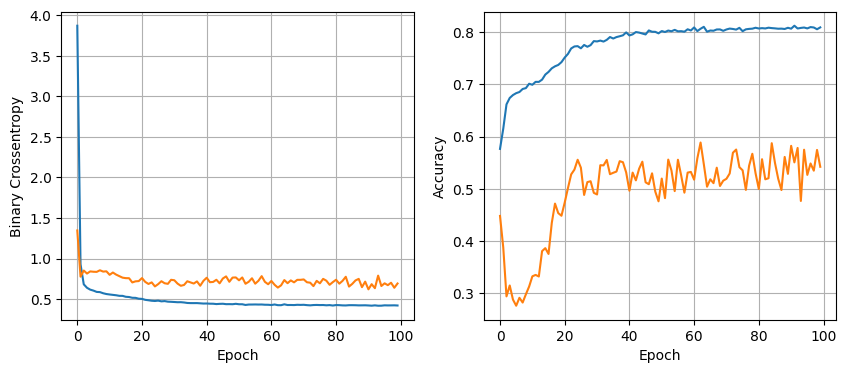

119/119 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8207
16 nodes, dropout 0.2, lr 0.001, batch size 128


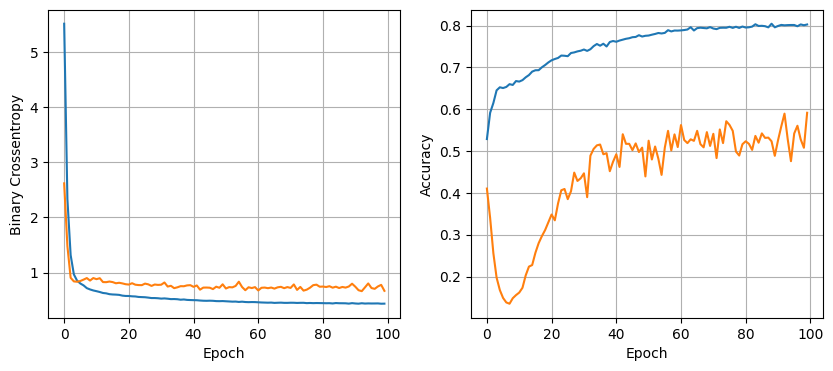

119/119 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.8273
32 nodes, dropout 0, lr 0.01, batch size 32


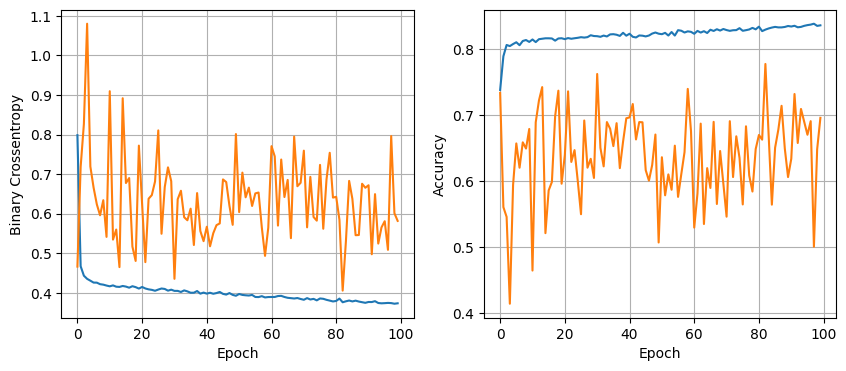

119/119 [==============================] - 0s 3ms/step - loss: 0.3671 - accuracy: 0.8528
32 nodes, dropout 0, lr 0.01, batch size 64


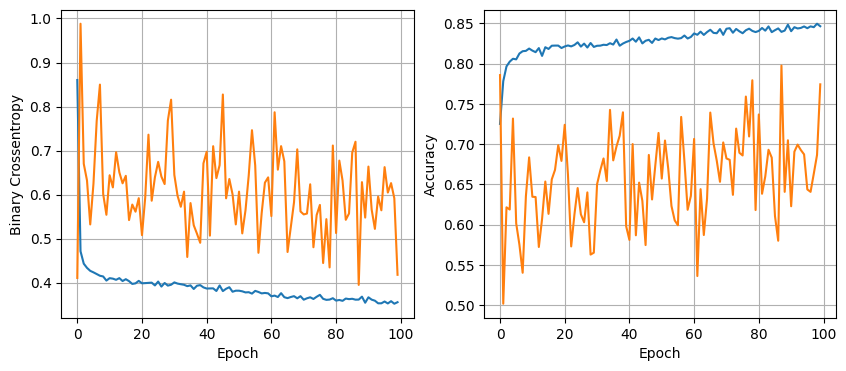

119/119 [==============================] - 0s 3ms/step - loss: 0.3976 - accuracy: 0.8341
32 nodes, dropout 0, lr 0.01, batch size 128


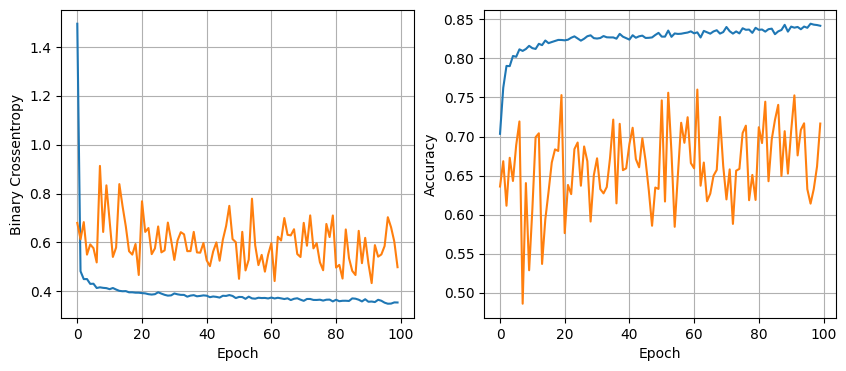

119/119 [==============================] - 0s 2ms/step - loss: 0.3797 - accuracy: 0.8389
32 nodes, dropout 0, lr 0.005, batch size 32


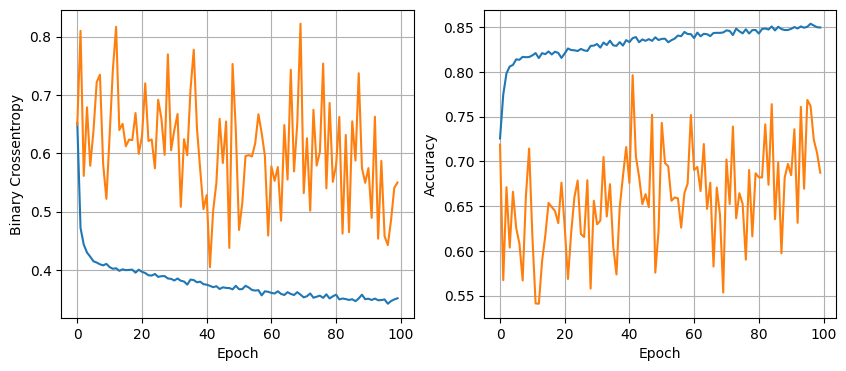

119/119 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.8557
32 nodes, dropout 0, lr 0.005, batch size 64


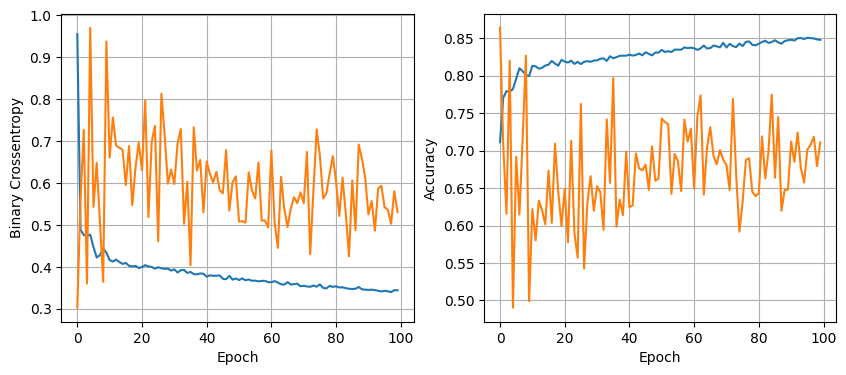

119/119 [==============================] - 0s 2ms/step - loss: 0.3710 - accuracy: 0.8446
32 nodes, dropout 0, lr 0.005, batch size 128


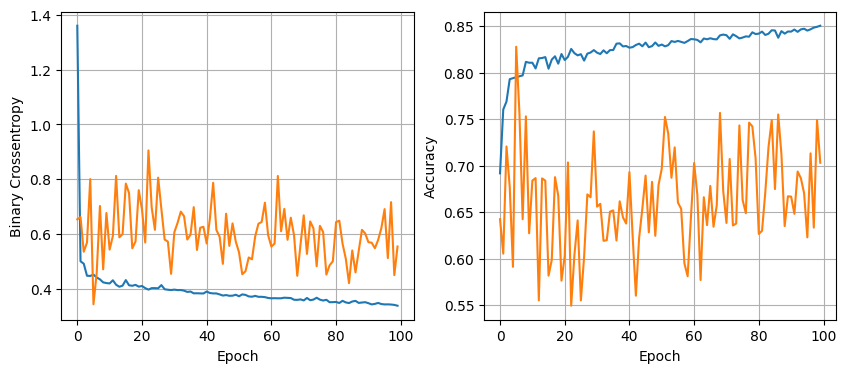

119/119 [==============================] - 0s 3ms/step - loss: 0.3743 - accuracy: 0.8502
32 nodes, dropout 0, lr 0.001, batch size 32


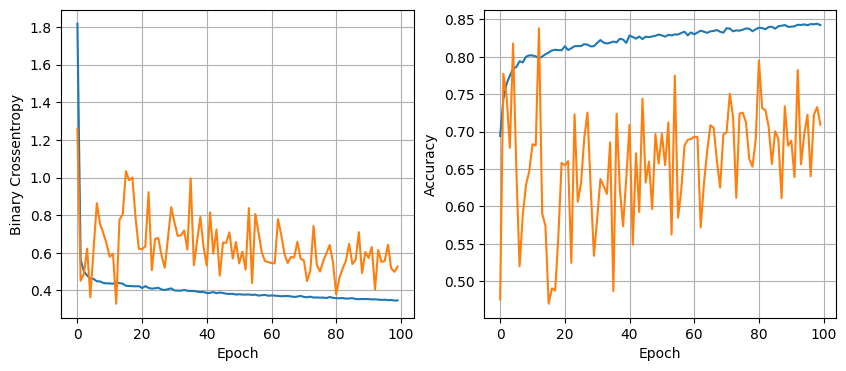

119/119 [==============================] - 0s 2ms/step - loss: 0.4078 - accuracy: 0.8368
32 nodes, dropout 0, lr 0.001, batch size 64


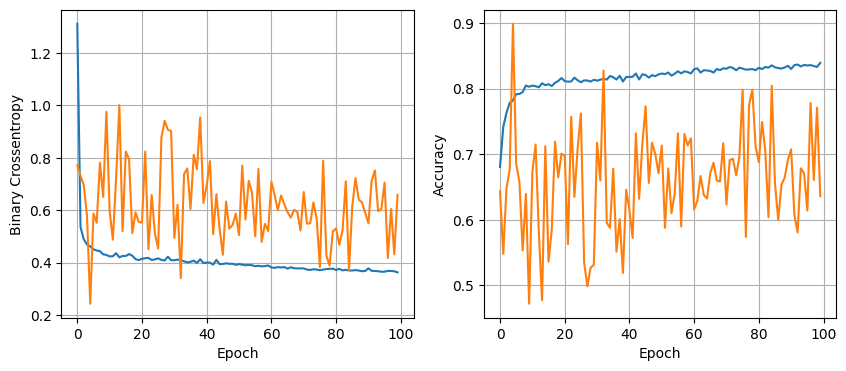

119/119 [==============================] - 0s 3ms/step - loss: 0.4027 - accuracy: 0.8333
32 nodes, dropout 0, lr 0.001, batch size 128


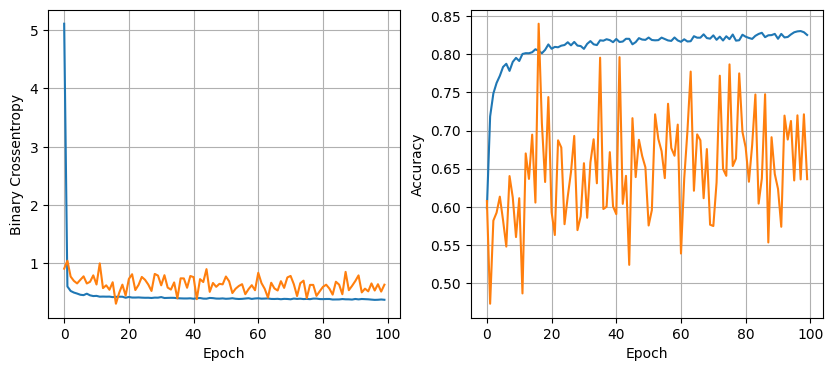

119/119 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8289
32 nodes, dropout 0.2, lr 0.01, batch size 32


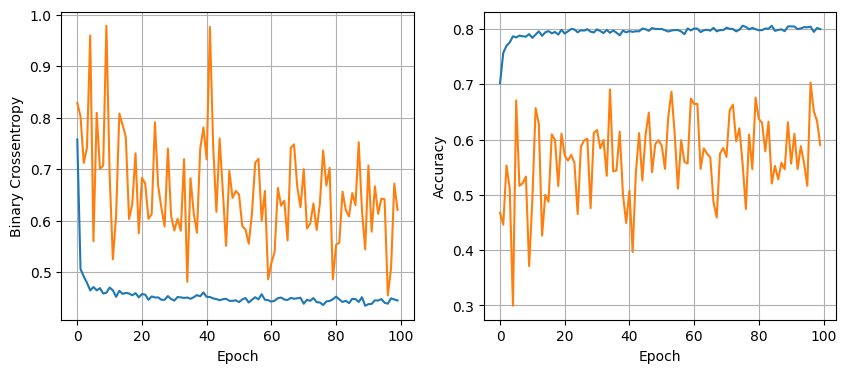

119/119 [==============================] - 0s 3ms/step - loss: 0.4291 - accuracy: 0.8244
32 nodes, dropout 0.2, lr 0.01, batch size 64


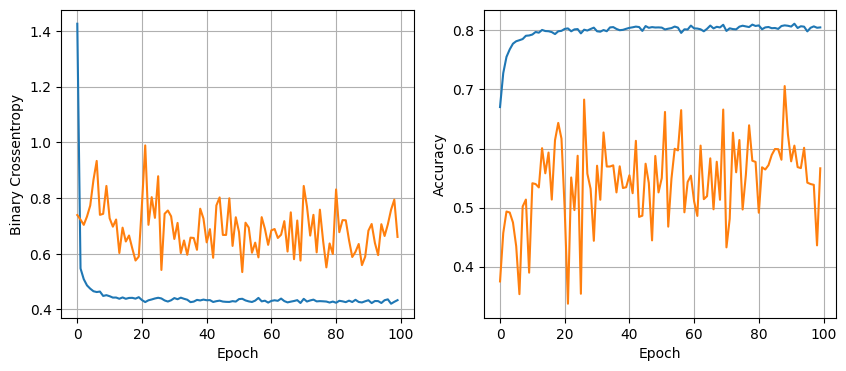

119/119 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8233
32 nodes, dropout 0.2, lr 0.01, batch size 128


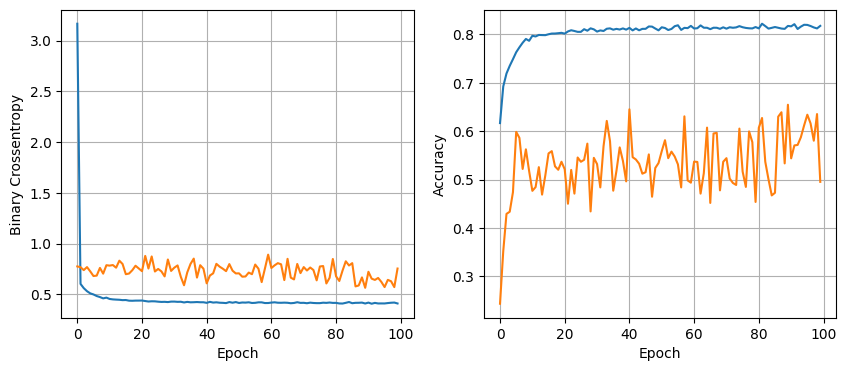

119/119 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8052
32 nodes, dropout 0.2, lr 0.005, batch size 32


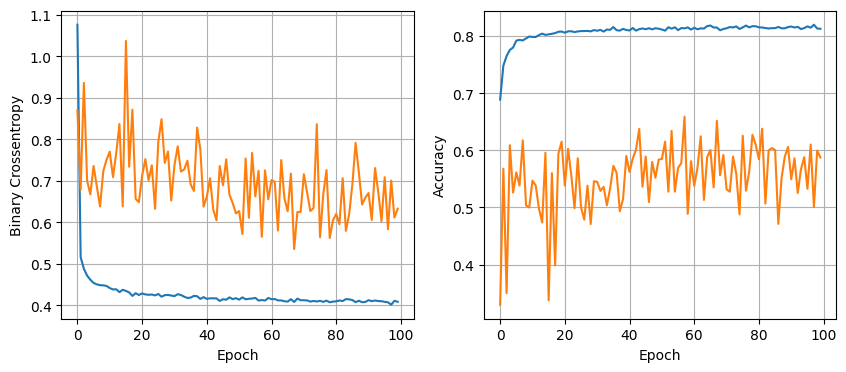

119/119 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8344
32 nodes, dropout 0.2, lr 0.005, batch size 64


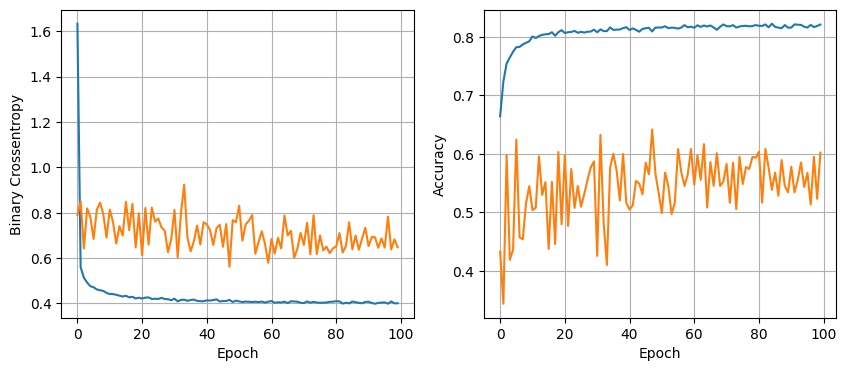

119/119 [==============================] - 0s 3ms/step - loss: 0.3762 - accuracy: 0.8362
32 nodes, dropout 0.2, lr 0.005, batch size 128


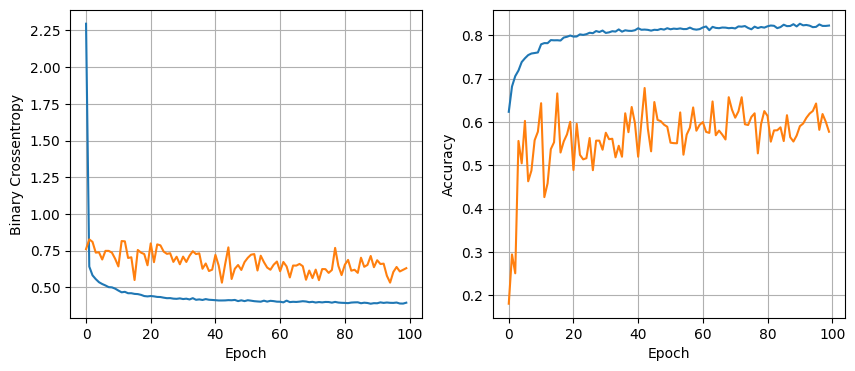

119/119 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8278
32 nodes, dropout 0.2, lr 0.001, batch size 32


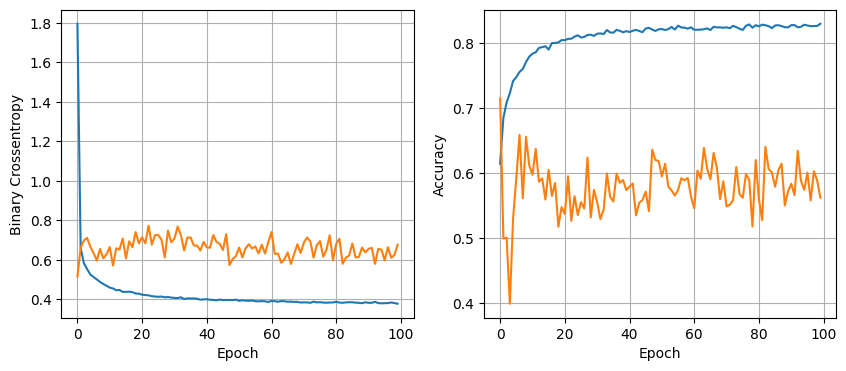

119/119 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8233
32 nodes, dropout 0.2, lr 0.001, batch size 64


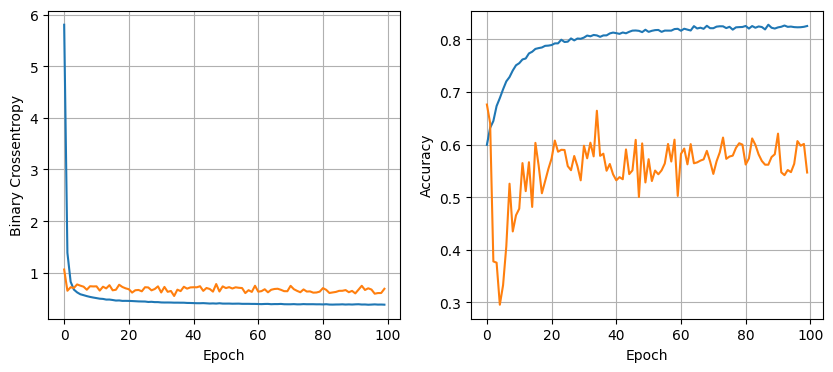

119/119 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8218
32 nodes, dropout 0.2, lr 0.001, batch size 128


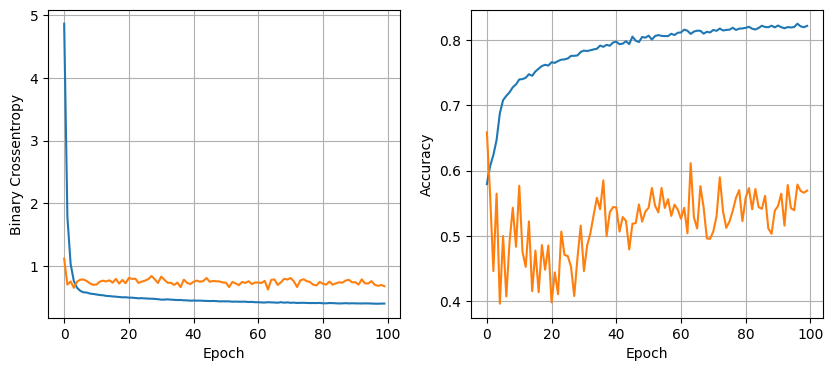

119/119 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8239
64 nodes, dropout 0, lr 0.01, batch size 32


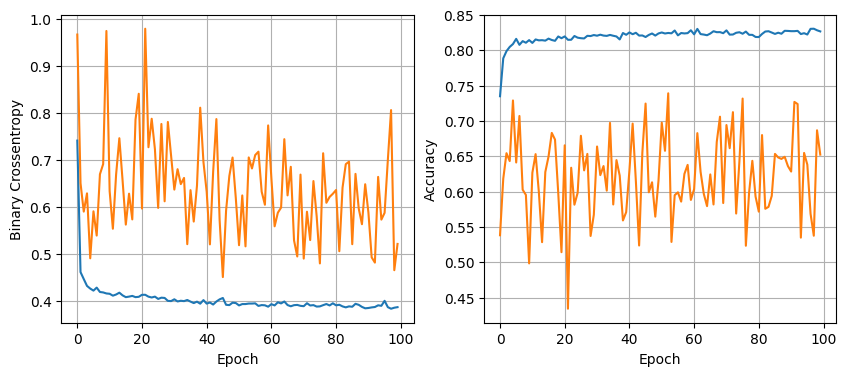

119/119 [==============================] - 0s 3ms/step - loss: 0.4040 - accuracy: 0.8320
64 nodes, dropout 0, lr 0.01, batch size 64


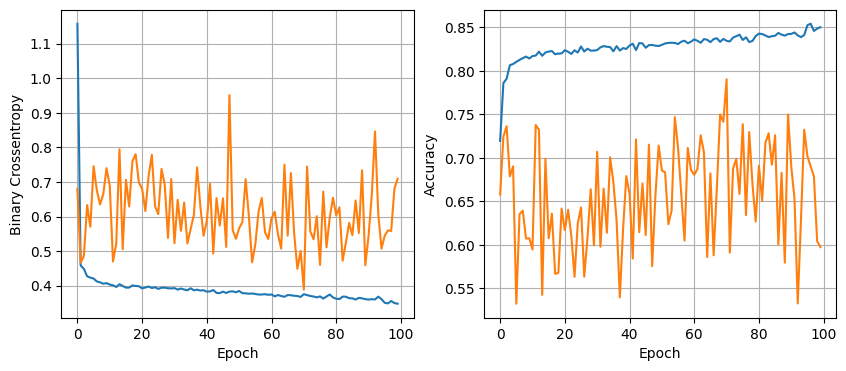

119/119 [==============================] - 0s 2ms/step - loss: 0.3738 - accuracy: 0.8457
64 nodes, dropout 0, lr 0.01, batch size 128


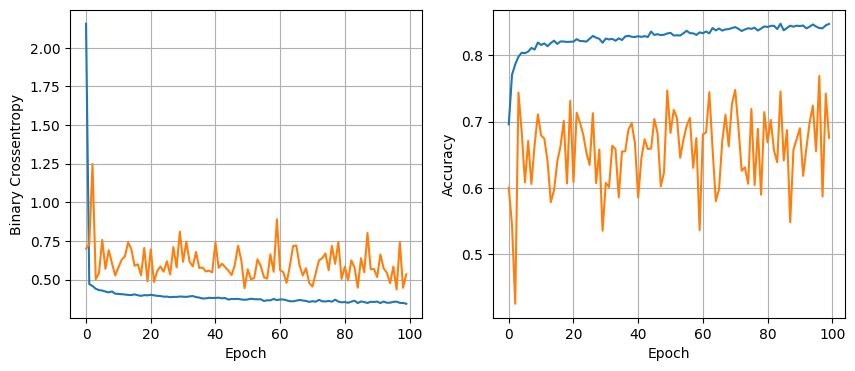

119/119 [==============================] - 0s 3ms/step - loss: 0.3927 - accuracy: 0.8407
64 nodes, dropout 0, lr 0.005, batch size 32


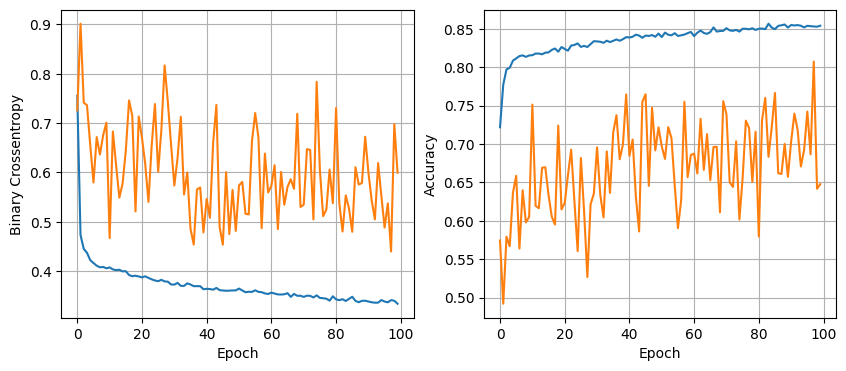

119/119 [==============================] - 0s 3ms/step - loss: 0.4092 - accuracy: 0.8433
64 nodes, dropout 0, lr 0.005, batch size 64


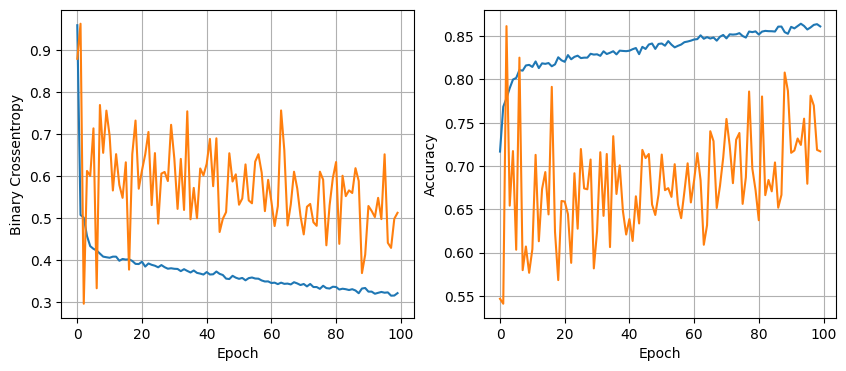

119/119 [==============================] - 0s 3ms/step - loss: 0.3658 - accuracy: 0.8570
64 nodes, dropout 0, lr 0.005, batch size 128


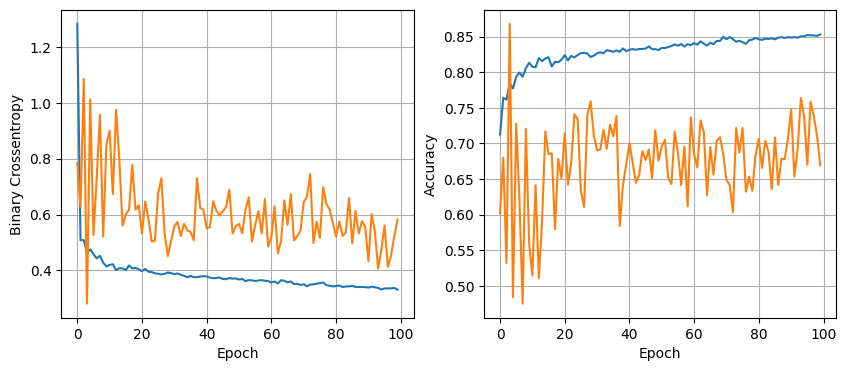

119/119 [==============================] - 0s 3ms/step - loss: 0.4090 - accuracy: 0.8318
64 nodes, dropout 0, lr 0.001, batch size 32


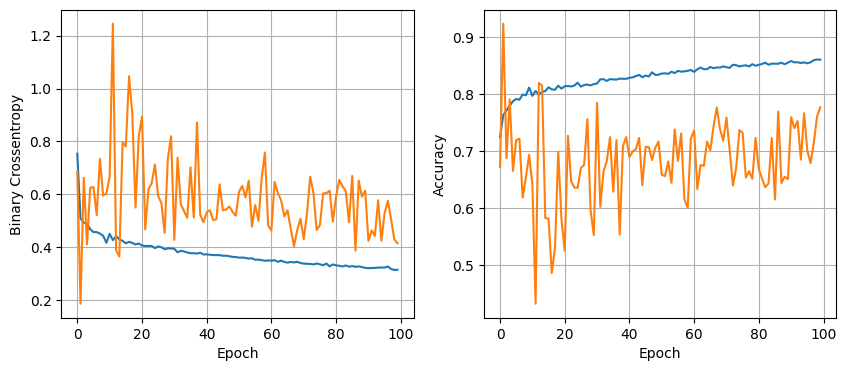

119/119 [==============================] - 0s 3ms/step - loss: 0.4189 - accuracy: 0.8302
64 nodes, dropout 0, lr 0.001, batch size 64


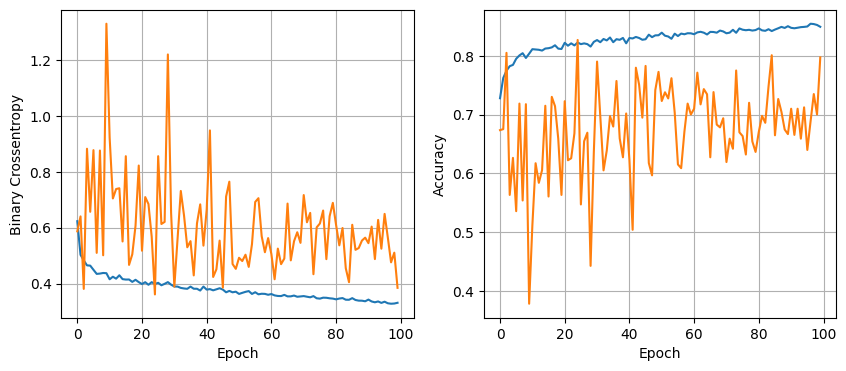

119/119 [==============================] - 0s 3ms/step - loss: 0.4293 - accuracy: 0.8228
64 nodes, dropout 0, lr 0.001, batch size 128


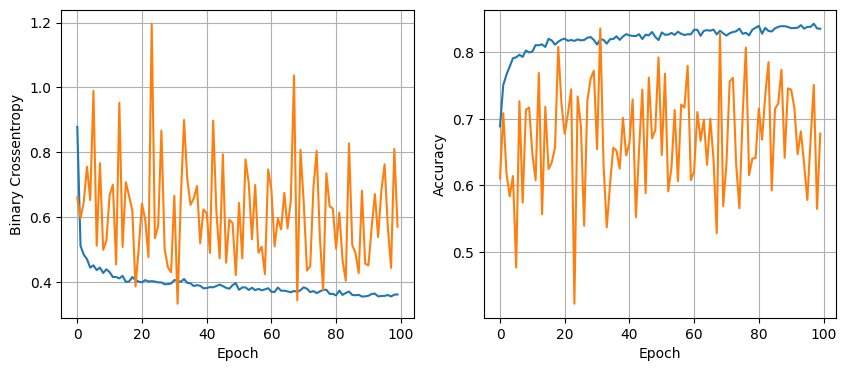

119/119 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8368
64 nodes, dropout 0.2, lr 0.01, batch size 32


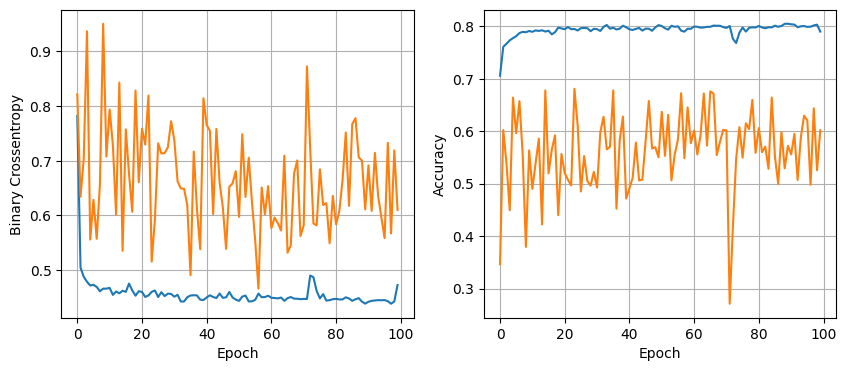

119/119 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.8207
64 nodes, dropout 0.2, lr 0.01, batch size 64


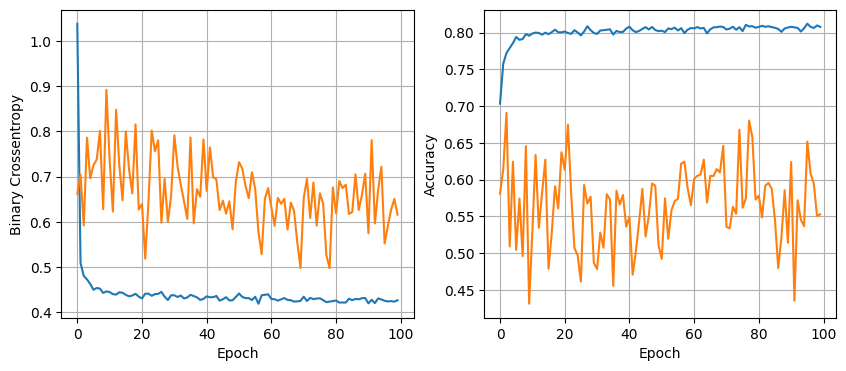

119/119 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8268
64 nodes, dropout 0.2, lr 0.01, batch size 128


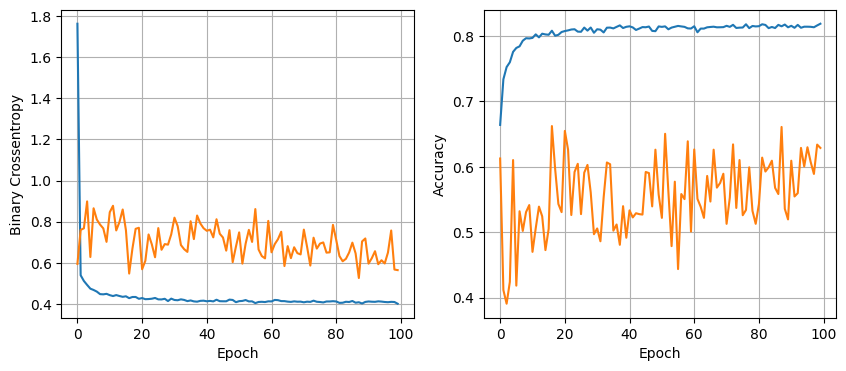

119/119 [==============================] - 0s 3ms/step - loss: 0.4177 - accuracy: 0.8252
64 nodes, dropout 0.2, lr 0.005, batch size 32


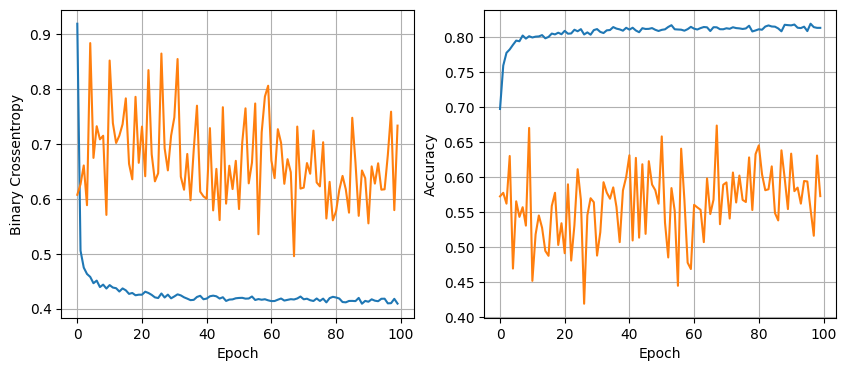

119/119 [==============================] - 0s 3ms/step - loss: 0.3913 - accuracy: 0.8302
64 nodes, dropout 0.2, lr 0.005, batch size 64


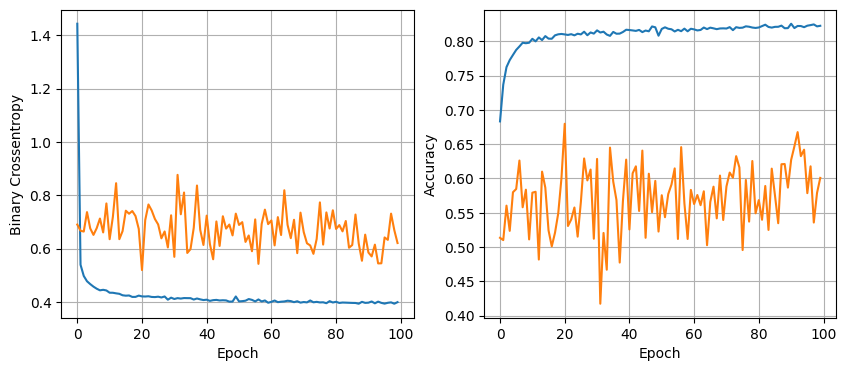

119/119 [==============================] - 0s 3ms/step - loss: 0.3999 - accuracy: 0.8344
64 nodes, dropout 0.2, lr 0.005, batch size 128


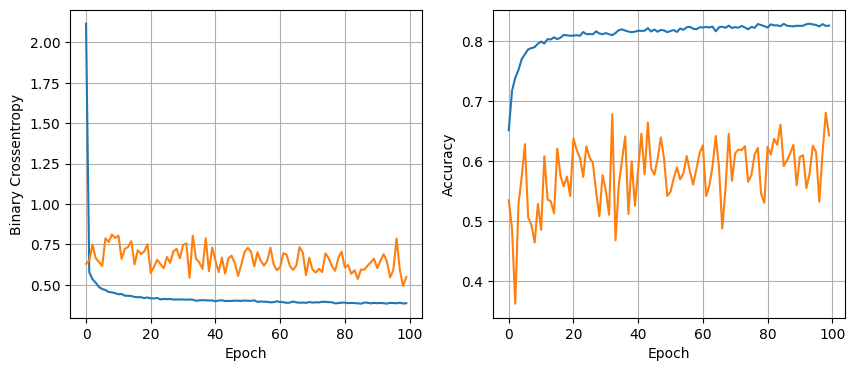

119/119 [==============================] - 0s 3ms/step - loss: 0.3922 - accuracy: 0.8331
64 nodes, dropout 0.2, lr 0.001, batch size 32


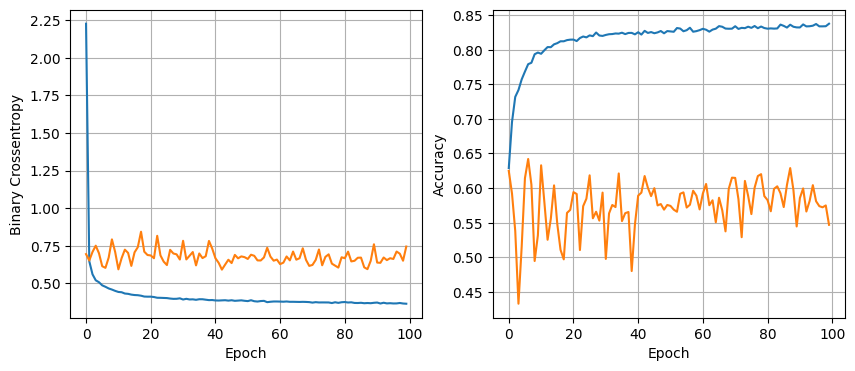

119/119 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8157
64 nodes, dropout 0.2, lr 0.001, batch size 64


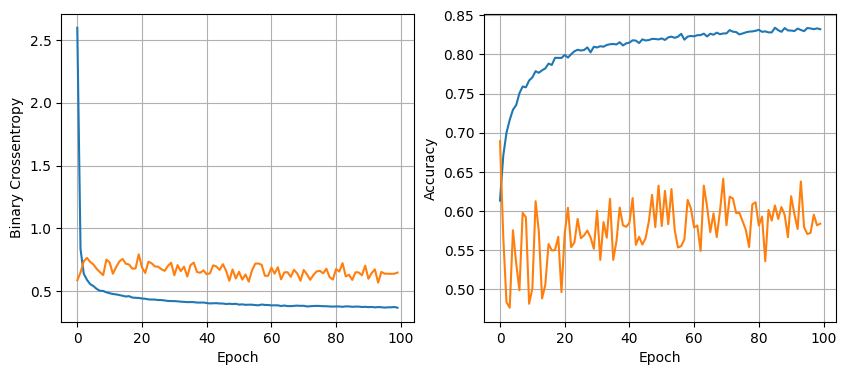

119/119 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.8344
64 nodes, dropout 0.2, lr 0.001, batch size 128


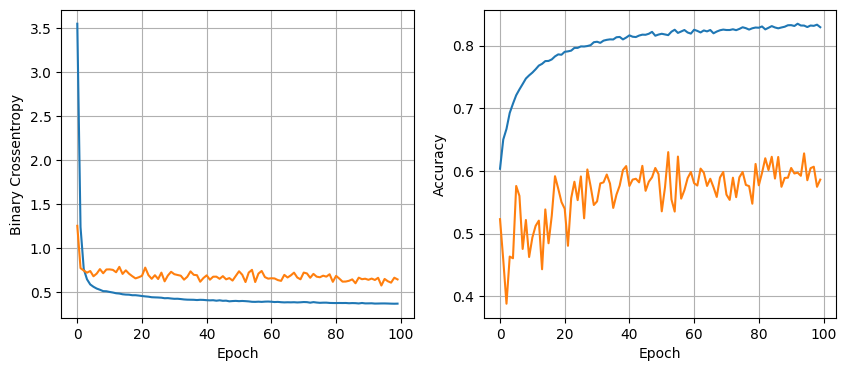

119/119 [==============================] - 0s 2ms/step - loss: 0.3781 - accuracy: 0.8291


In [31]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100

for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]  # Obter apenas o valor da perda
        if val_loss < least_val_loss:
         least_val_loss = val_loss
         least_loss_model = model


**Representing y_pred on binary **

In [33]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
y_pred

119/119 [==============================] - 0s 2ms/step


array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

**Representating y_pred - One-dimensional**

In [34]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred

119/119 [==============================] - 0s 1ms/step


array([1, 1, 0, ..., 0, 0, 0])

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80      1352
           1       0.87      0.93      0.90      2452

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.86      3804

